# Multivariate Categoricals

In this exercise, we will compare the Maximum Likelihood (ML) estimator with the Maximum A Posteriori (MAP) estimator for the tosses of a dice.

In the event of a persistent problem, do not hesitate to contact the course instructors under
- paul.kahlmeyer@uni-jena.de

### Submission

- Deadline of submission:
        08.11.2023 00:00
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=51072)

### Help
In case you cannot solve a task, you can use the saved values within the `help` directory:
- Load arrays with [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.load.html)
```
np.load('help/array_name.npy')
```
- Load functions with [Dill](https://dill.readthedocs.io/en/latest/dill.html)
```
import dill
with open('help/some_func.pkl', 'rb') as f:
    func = dill.load(f)
```

to continue working on the other tasks.

# An unfair die

Suppose, we can observe the results of tossing a die. We want to know, if the die is fair or not. 

After we observed 20 tosses, we stop and analyse.

Load the results of these 20 tosses from `die1.npy`.

In [1]:
# TODO: load data
import numpy as np

die1 = np.load('die1.npy')

We consider the result of the dice toss as a multivariate categorical random variable
\begin{equation}
X\sim Cat(\boldsymbol{p})\,,
\end{equation}
where $\boldsymbol{p}$ is the vector of probabilities for tossing a certain result.

## Maximum Likelihood Estimate

The Maximum Likelihood estimator for multivariate categoricals on a dataset is defined as the vector

\begin{equation}
\boldsymbol{p}_{\text{ML}} = \left[\cfrac{m(x)}{m}\right]_{x\in\mathcal{X}}\,,
\end{equation}
where $\mathcal{X}$ is the sample space, $m$ is the size of the dataset and $m(x)$ counts the number of occurences of $x$ in the dataset.


### Task 1

Implement this estimator within the function `estimate_ML`.
Calculate the ML-Estimate for $\boldsymbol{p}$.

In [2]:
import dill as dill


def estimate_ML(observations, categories):
    '''
    Calculates the Maximum Likelihood estimate for p.
    
    @Params:
        observations... observations
        categories... possible outcomes
    
    @Returns:
        estimated probability vector p_ML
    '''
    p_ML = np.zeros(len(categories))
    for i, c in enumerate(categories):
        p_ML[i] = np.sum(observations == c) / len(observations)

    return p_ML

print(estimate_ML(die1, [1,2,3,4,5,6]))
print(np.sum(estimate_ML(die1, [1,2,3,4,5,6])))

# load help/estimate_ML.pkl
with open('help/estimate_ML.pkl', 'rb') as f:
    estimate_ML = dill.load(f)
print(estimate_ML(die1, [1,2,3,4,5,6]))

[0.15 0.3  0.25 0.1  0.15 0.05]
1.0
[0.15 0.3  0.25 0.1  0.15 0.05]


## MAP Estimate

In the Bayesian framework, we encode an initial belief over $\boldsymbol{p}$ with a **prior distribution**.
We then use observed evidence to **update the prior to a posterior distribution**.

In our case, we use a [dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) as prior. This distribution is defined by a parameter vector $\alpha\in\mathbb{R}^{|\mathcal{X}|}_{+}$. 
That is, we assume 
\begin{equation}
\boldsymbol{p}\sim\text{Dir}(\alpha)\,.
\end{equation}
The parameter vector $\alpha$ has a positive entry for each element of the sample space.


Now given a dataset $X$, we update our prior belief to a posterior belief:
\begin{equation}
p(\boldsymbol{p}) \rightarrow p(\boldsymbol{p}|X)\,.
\end{equation}

Since the dirichlet distribution is a [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior), the posterior is again a dirichlet distribution
\begin{equation}
p(\boldsymbol{p}|X)\sim\text{Dir}(\boldsymbol{m} + \alpha)\,
\end{equation}
where $\boldsymbol{m}$ is the vector 
\begin{equation}
\left[m(x)\right]_{x\in\mathcal{X}}
\end{equation}

TLDR: We use data $X$ to update $\alpha_{\text{prior}}$ to $\alpha_{\text{posterior}}$.

### Task 2
Use a prior of $\alpha_{\text{prior}}=[10,10,10,10,10,10]$ and calculate $\alpha_{\text{posterior}}$ given our 20 tosses.
Implement and use the `update` function.

In [3]:
def update(prior_alpha, evidence, categories):
    '''
    Updates the parameter vector alpha from prior to posterior.
    
    @Params:
        prior_alpha... alpha from prior distribution
        evidence... observed evidence
        categories... possible outcomes
        
    @Returns:
         alpha of posterior distribution
    '''

    posterior_alpha = prior_alpha + np.array([np.sum(evidence == c) for c in categories])
    return posterior_alpha

prior_alpha = np.array([10,10,10,10,10,10])
posterior_alpha = update(prior_alpha, die1, [1,2,3,4,5,6])
posterior_alpha

array([13, 16, 15, 12, 13, 11])

The Maximum A Posteriori (MAP) estimate is the vector $\boldsymbol{p}$, where the posterior distribution has its maximum.

For the dirichlet prior on multivariate categoricals this MAP estimate is

\begin{equation}
\boldsymbol{p}_{\text{MAP}} = \cfrac{m(x) + \alpha_{\text{prior}}(x) -1}{m -|\mathcal{X}| + \sum_{x'\in\mathcal{X}}\alpha_{\text{prior}}(x')}\,.
\end{equation}

### Task 3
Implement this estimator within the `estimate_MAP` function. Calculate the MAP estimate.

In [4]:
def estimate_MAP(prior_alpha, evidence, categories):
    '''
    Calculates the maximum a posteriori estimate for p.
    
    @Params:
        prior_alpha... alpha from prior distribution
        evidence... observed evidence
        categories... possible outcomes
    
    
    @Returns:
        estimated probability vector p_MAP
    '''
    posterior_alpha = update(prior_alpha, evidence, categories)
    p_MAP = (posterior_alpha - 1) / (np.sum(posterior_alpha) - len(categories))
    return p_MAP

print(estimate_MAP(prior_alpha, die1, [1,2,3,4,5,6]))

# load help/estimate_MAP.pkl
with open('help/estimate_MAP.pkl', 'rb') as f:
    estimate_MAP = dill.load(f)
print(estimate_MAP(prior_alpha, die1, [1,2,3,4,5,6]))

[0.16216216 0.2027027  0.18918919 0.14864865 0.16216216 0.13513514]
[0.16216216 0.2027027  0.18918919 0.14864865 0.16216216 0.13513514]


## Comparison

Both estimators yield quite different results.
This is due to the small number of 20 tosses that we observed so far.

Load all 200 observations stored in `die2.npy`.

In [5]:
die2 = np.load('die2.npy')

### Task 4

- Estimate $p_{\text{ML}}$ and $p_{\text{MAP}}$ for an increasing amount of observations.
In each iteration, use 5 observations more than before. That is in the first iteration you use the first 5 observations, in the second iteraton you use the first 10 iterations and so on.

- Visualize, how the estimates change with more available data.
You can use the `utils.create_animation` function or write your own visualization.

- Briefly describe, what you observe. Finally, do you think the die is unfair?

In [8]:
prior_alpha = np.array([10,10,10,10,10,10])
categories = [1,2,3,4,5,6]

ML_estimates = []
MAP_estimates = []
for i in range(5, len(die2) + 1, 5):
    ML_estimates.append(estimate_ML(die2[:i], categories))
    MAP_estimates.append(estimate_MAP(prior_alpha, die2[:i], categories))

<IPython.core.display.Javascript object>


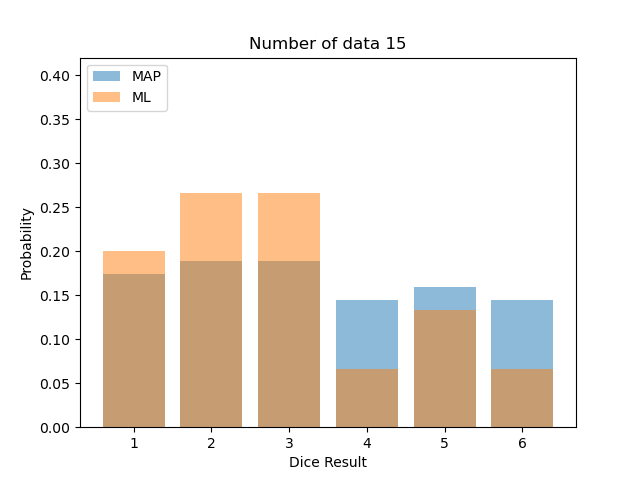

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

def create_animation(MAP_estimates, ML_estimates, stepsize=10, fps=10):
    '''
    Creates an animated view of the MAP estimates (blue) and the ML estimates (orange).

    @Params:
        MAP_estimates...    List of MAP estimates
        ML_estimates...     List of ML estimates
        stepsize...         Number of observations, that were added in each iteration
        fps...              Frames per second

    @Returns:
        FuncAnimation object - Call plt.show() to display it 
        (In Jupyter Notebook, use %matplotlib notebook)
    '''
    
    n_frames = len(MAP_estimates)
    interval = int(1000/fps)

    fig=plt.figure()

    # initial plot
    x = np.arange(1,len(MAP_estimates[0])+1,1)
    bars_MAP = plt.bar(x, MAP_estimates[0], alpha=0.5, label='MAP')
    bars_ML = plt.bar(x, ML_estimates[0], alpha=0.5, label='ML')
    title = plt.title(f'Number of data {stepsize}')
    plt.legend(loc='upper left')
    plt.xlabel('Dice Result')
    plt.ylabel('Probability')
    # update of plot
    def animate(i):
        title.set_text(f'Number of data {stepsize*(i+1)}')
        for j, b in enumerate(bars_MAP):
            b.set_height(MAP_estimates[i][j])
        for j, b in enumerate(bars_ML):
            b.set_height(ML_estimates[i][j])

    return animation.FuncAnimation(fig, animate, repeat=True, blit=False, frames=n_frames, interval=interval)

animation = create_animation(MAP_estimates, ML_estimates, stepsize=5, fps=3)

My observations are that the MAP estimate is more stable than the ML
estimate. The ML estimate is more sensitive to outliers. MAP is closer to a
equal distribution. The diference between MAP and ML gets smaller with a higer
number of data poinst. The die is unfair because the probability of the result 2
is much higher than the probability of the result 1.